In [1]:
import pandas as pd
from scipy import stats as sps
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.distributions.empirical_distribution import ECDF
import math
import seaborn as sns
from statsmodels.stats.descriptivestats import sign_test

In [2]:
data_frame = pd.read_excel("data_matstat_K5.xlsx", sheet_name = 'C - plasma')
data_frame.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799


In [3]:
n = len(data_frame['C13'])
print(n)

315


In [4]:
n = len(data_frame['C14'])
print(n)

315


**Задание 1.1**

In [5]:
data_frame.describe()

,C1,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,50.146032,26.157374,1796.654603,77.033333,12.788571,3.279365,242.460635,2185.603175,832.714286,189.892063,602.790476
std,14.575226,6.013550,680.347435,33.829443,5.330192,12.322880,131.991614,1473.886547,589.289030,183.000803,208.895474
min,19.000000,16.331140,445.200000,14.400000,3.100000,0.000000,37.700000,214.000000,30.000000,0.000000,179.000000
25%,39.000000,21.799715,1338.000000,53.950000,9.150000,0.000000,155.000000,1116.000000,480.000000,90.000000,466.000000
50%,48.000000,24.735250,1666.800000,72.900000,12.100000,0.300000,206.300000,1802.000000,707.000000,140.000000,566.000000
75%,62.500000,28.853415,2100.450000,95.250000,15.600000,3.200000,308.850000,2836.000000,1037.000000,230.000000,716.000000
max,83.000000,50.403330,6662.200000,235.900000,36.800000,203.000000,900.700000,9642.000000,6901.000000,1415.000000,1727.000000


In [6]:
sps.describe(data_frame['C7']) 

DescribeResult(nobs=315, minmax=(14.4, 235.9), mean=77.03333333333333, variance=1144.431210191083, skewness=1.0989962157492976, kurtosis=1.9647991849352238)

In [7]:
sps.describe(data_frame['C9'])

DescribeResult(nobs=315, minmax=(0.0, 203.0), mean=3.2793650793650793, variance=151.8533626529168, skewness=13.757134658078, kurtosis=217.81506388614636)

In [8]:
sps.describe(data_frame['C12'])

DescribeResult(nobs=315, minmax=(30, 6901), mean=832.7142857142857, variance=347261.5614194723, skewness=4.452504551684713, kurtosis=37.44713035757864)

**Задание 1.2**

In [9]:
n = len(data_frame['C7'])
print(n)

315


In [10]:
#формула Стерджесса
number = int(1 + math.log2(n))
print(number)

9


In [11]:
step = int((data_frame['C7'].max() - data_frame['C7'].min()) / number)
print(step)

24


[ 33. 100.  84.  54.  29.   6.   6.   2.   1.]
[ 14.4         39.01111111  63.62222222  88.23333333 112.84444444
 137.45555556 162.06666667 186.67777778 211.28888889]
[ 39.01111111  63.62222222  88.23333333 112.84444444 137.45555556
 162.06666667 186.67777778 211.28888889 235.9       ]


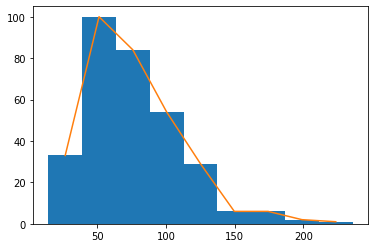

In [12]:
frequencies, edges, _ = plt.hist(data_frame['C7'], bins=number)
midpoints = 0.5 * (edges[1:] + edges[:-1])
print(frequencies)
print(edges[:-1])
print(edges[1:])
plt.plot(midpoints, frequencies, '-');

[0.1047619  0.31746032 0.26666667 0.17142857 0.09206349 0.01904762
 0.01904762 0.00634921 0.0031746 ]
[ 14.4         39.01111111  63.62222222  88.23333333 112.84444444
 137.45555556 162.06666667 186.67777778 211.28888889]
[ 39.01111111  63.62222222  88.23333333 112.84444444 137.45555556
 162.06666667 186.67777778 211.28888889 235.9       ]


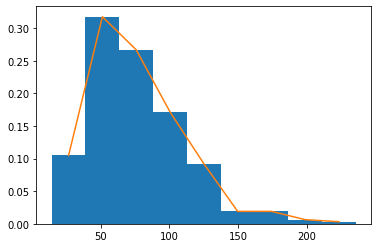

In [13]:
relative_frequencies, edges, _ = plt.hist(data_frame['C7'], bins=number, weights=np.zeros_like(data_frame['C7']) + 1. / n)
print(relative_frequencies)
print(edges[:-1])
print(edges[1:])
midpoints = 0.5 * (edges[1:] + edges[:-1])
plt.plot(midpoints, relative_frequencies, '-');

[ 33. 133. 217. 271. 300. 306. 312. 314. 315.]
[ 39.01111111  63.62222222  88.23333333 112.84444444 137.45555556
 162.06666667 186.67777778 211.28888889 235.9       ]
[ 14.4         39.01111111  63.62222222  88.23333333 112.84444444
 137.45555556 162.06666667 186.67777778 211.28888889]


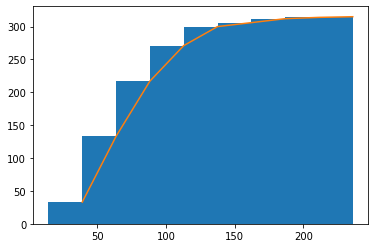

In [14]:
accumulated_frequencies, edges, _ = plt.hist(data_frame['C7'], bins=number, cumulative=True)
print(accumulated_frequencies)
print(edges[1:])
print(edges[:-1])
midpoints = 0.5 * (edges[1:] + edges[:-1])
plt.plot(edges[1:], accumulated_frequencies, '-');

[0.1047619  0.42222222 0.68888889 0.86031746 0.95238095 0.97142857
 0.99047619 0.9968254  1.        ]
[ 39.01111111  63.62222222  88.23333333 112.84444444 137.45555556
 162.06666667 186.67777778 211.28888889 235.9       ]
[ 14.4         39.01111111  63.62222222  88.23333333 112.84444444
 137.45555556 162.06666667 186.67777778 211.28888889]


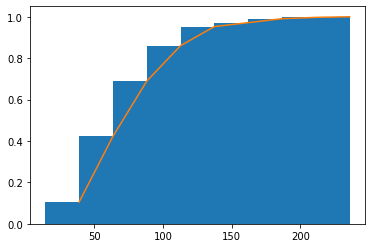

In [15]:
relative_accumulated_frequencies, edges, _ = plt.hist(data_frame['C7'], bins=number, weights=np.zeros_like(data_frame['C7']) + 1. / n, cumulative=True)
print(relative_accumulated_frequencies)
print(edges[1:])
print(edges[:-1])
midpoints = 0.5 * (edges[1:] + edges[:-1])
plt.plot(edges[1:], relative_accumulated_frequencies, '-');

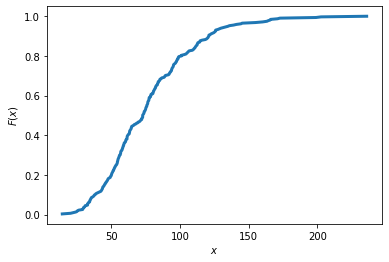

In [16]:
ecdf = ECDF(data_frame['C7'])
plt.plot(ecdf.x, ecdf.y, lw=3)
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

**Задание 2.1**

In [17]:
alphas = [0.01, 0.05, 0.1]

In [18]:
for alpha in alphas:
    interval = (data_frame['C7'].std() / n ** 0.5) * sps.t.ppf(1 - alpha / 2, n - 1)
    print(alpha)
    print('  lower edge:', data_frame['C7'].mean() - interval)
    print('  higher edge:', data_frame['C7'].mean() + interval)

0.01
  lower edge: 72.09359774349191
  higher edge: 81.97306892317475
0.05
  lower edge: 73.28304344314049
  higher edge: 80.78362322352618
0.1
  lower edge: 73.8888447091652
  higher edge: 80.17782195750146


In [19]:
data_frame['C7'].mean()

77.03333333333333

**Задание 2.2**

In [20]:
for alpha in alphas:
    lower_edge = (n - 1) * data_frame['C7'].var() /(sps.chi2.ppf(1 - alpha / 2, n - 1))
    higher_edge = (n - 1) * data_frame['C7'].var() /(sps.chi2.ppf(alpha / 2, n - 1))
    print(alpha)
    print('  lower edge:', lower_edge)
    print('  higher edge:', higher_edge)

0.01
  lower edge: 939.972084131803
  higher edge: 1419.1945094555533
0.05
  lower edge: 984.571373041788
  higher edge: 1346.872632211083
0.1
  lower edge: 1008.4926769611158
  higher edge: 1311.7502714531515


In [21]:
data_frame['C7'].var()

1144.431210191083

**Задание 2.3**

In [22]:
n1 = len(data_frame['C13'])
s1 = data_frame['C13'].std()
n2 = len(data_frame['C14'])
s2 = data_frame['C14'].std()
s = (((n1 - 1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2)) ** 0.5
for alpha in alphas:
    #interval = data_frame['C13'].std() * stats.t.ppf(1 - alpha / 2, len(data_frame['C13']) + len(data_frame['C14']) - 2) / ((data_frame['C14'].var() / n + data_frame['C14'].var()/ len(data_frame['C14'])) ** 0.5)
    interval = sps.t.ppf(1 - alpha/2, n1 + n2 - 2) * s * (1/n1 + 1/n2) ** 0.5
    print(alpha)
    print('  lower edge:', data_frame['C13'].mean() - data_frame['C14'].mean() - interval)
    print('  higher edge:', data_frame['C13'].mean() - data_frame['C14'].mean() + interval)

0.01
  lower edge: -453.3267319085694
  higher edge: -372.470093488256
0.05
  lower edge: -443.6263036888957
  higher edge: -382.1705217079297
0.1
  lower edge: -438.6743954295366
  higher edge: -387.1224299672888


In [23]:
data_frame['C13'].mean() - data_frame['C14'].mean()

-412.8984126984127

**Задание 2.4**

In [24]:
for alpha in alphas:
    lower_edge = (data_frame['C13'].var() / data_frame['C14'].var()) * (sps.f.ppf(alpha / 2, n2 - 1, n1 - 1))
    higher_edge = (data_frame['C13'].var() / data_frame['C14'].var()) * (sps.f.ppf(1- alpha / 2, n2 - 1, n1 - 1))
    print(alpha)

    print('  lower edge:', lower_edge)
    print('  higher edge:', higher_edge)
    print()

0.01
  lower edge: 0.5734087875377081
  higher edge: 1.0271444406441992

0.05
  lower edge: 0.6148952188376793
  higher edge: 0.9578439224965994

0.1
  lower edge: 0.637234697462504
  higher edge: 0.9242648755336237



In [25]:
data_frame['C13'].var() / data_frame['C14'].var()

0.7674461859543558

**Задание 3**

**Задания 3.1**

In [26]:
print(data_frame['C7'].mean())
print(data_frame['C7'].std())

77.03333333333333
33.82944294828224


In [27]:
sps.ttest_1samp(data_frame['C7'], 77)

Ttest_1sampResult(statistic=0.01748796098163266, pvalue=0.9860584437550612)

In [28]:
sps.ttest_1samp(data_frame['C7'], 250)

Ttest_1sampResult(statistic=-90.74502953369704, pvalue=2.350509132273903e-227)

In [29]:
sps.ttest_1samp(data_frame['C7'], 860)

Ttest_1sampResult(statistic=-410.774715497593, pvalue=0.0)

**Задание 3.2**

In [30]:
def one_sample_chi_test_unknown(x, sigma0):
    S_squared = 1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])
    z = (len(x) - 1) * S_squared / sigma0 ** 2
    f = sps.chi2.cdf(z, df=len(x)-1)
    return z, 2 * min(f, 1 - f)

In [31]:
print(one_sample_chi_test_unknown(data_frame['C7'], 34))

(310.85761245674746, 0.9209902160950361)


In [32]:
print(one_sample_chi_test_unknown(data_frame['C7'], 340))

(3.108576124567475, 4.2802552281498377e-249)


In [33]:
print(one_sample_chi_test_unknown(data_frame['C7'], 760))

(0.6221457756232689, 0.0)


**Задание 3.3**

In [34]:
print(data_frame['C13'].mean())
print(data_frame['C14'].mean())

189.8920634920635
602.7904761904762


In [35]:
def two_sample_t_test(x, y):
    S_1 = (1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])) 
    S_2 = (1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y]))
    S = ((len(x) - 1) * S_1 + (len(y) - 1) * S_2) / (len(x) + len(y) - 2)
    z = (x.mean() - y.mean()) * (1 / len(x) + 1 / len(y)) ** 0.5 / S ** 0.5
    f = sps.t.cdf(z, df=len(x)+len(y)-2)
    return z, 2 * min(f, 1 - f)

In [36]:
print(two_sample_t_test(data_frame['C13'], data_frame['C14']))

(-0.16753895489930368, 0.8669999346360913)


In [37]:
#sigma1 != sigma2
def two_sample_t_test_2(x, y):
    S_1 = (1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])) 
    S_2 = (1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y]))
    z = (x.mean() - y.mean()) / (S_1 / len(x) + S_2 / len(y)) ** 0.5
    t1 = S_1  / len(x)
    t2 = S_2 / len(y)
    k = (t1 / (t1 + t2)) ** 2 / (len(x) - 1) + (t2 / (t1 + t2)) ** 2 / (len(y) - 1)
    f = sps.t.cdf(z, df=int(1 / k))
    return z, 2 * min(f, 1 - f)

In [38]:
print(two_sample_t_test_2(data_frame['C13'], data_frame['C14']))

(-26.387385396640326, 2.7044815438723324e-103)


**Задание 3.4**

In [39]:
print(data_frame['C13'].var())
print(data_frame['C14'].var())

33489.2940450915
43637.31901728845


In [40]:
def two_sample_f_test(x, y):
    S_1 = 1 / (len(x) - 1) * sum([(i - x.mean()) ** 2 for i in x])
    S_2 = 1 / (len(y) - 1) * sum([(i - y.mean()) ** 2 for i in y])
    z = S_1 / S_2
    f = sps.f.cdf(z, dfn=len(x)-1, dfd=len(y)-1)
    return z, 2 * min(f, 1 - f)

In [41]:
print(two_sample_f_test(data_frame['C13'], data_frame['C14']))

(0.7674461859543552, 0.01929088453087414)


**Задание 4**

**Задание 4.1**

In [42]:
number = int(1 + math.log2(n))
print(number)

9


In [43]:
step = int((data_frame['C7'].max() - data_frame['C7'].min()) / number)
print(step)

24


[ 33. 100.  84.  54.  29.   6.   6.   2.   1.]
[ 14.4         39.01111111  63.62222222  88.23333333 112.84444444
 137.45555556 162.06666667 186.67777778 211.28888889]
[ 39.01111111  63.62222222  88.23333333 112.84444444 137.45555556
 162.06666667 186.67777778 211.28888889 235.9       ]


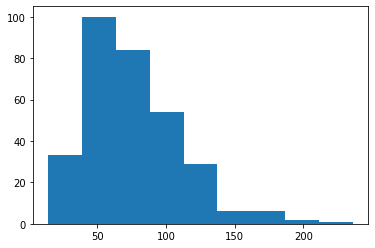

In [44]:
frequencies, edges, _ = plt.hist(data_frame['C7'], bins=number)
print(frequencies)
print(edges[:-1])
print(edges[1:])
midpoints = 0.5 * (edges[1:] + edges[:-1])

[0.1047619  0.31746032 0.26666667 0.17142857 0.09206349 0.01904762
 0.01904762 0.00634921 0.0031746 ]
[ 14.4         39.01111111  63.62222222  88.23333333 112.84444444
 137.45555556 162.06666667 186.67777778 211.28888889]
[ 39.01111111  63.62222222  88.23333333 112.84444444 137.45555556
 162.06666667 186.67777778 211.28888889 235.9       ]


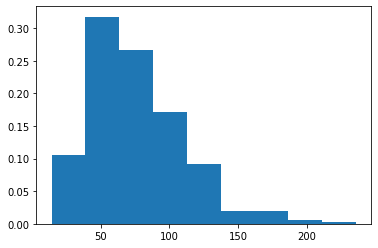

In [45]:
relative_frequencies, edges, _ = plt.hist(data_frame['C7'], bins=number, weights=np.zeros_like(data_frame['C7']) + 1. / n)
midpoints = 0.5 * (edges[1:] + edges[:-1])
print(relative_frequencies)
print(edges[:-1])
print(edges[1:])

In [46]:
loc = data_frame['C7'].mean()
scale = data_frame['C7'].std()
probabilities = [sps.norm.cdf(edges[i], loc=loc, scale=scale) - sps.norm.cdf(edges[i - 1], loc=loc, scale=scale) for i in range(1, number + 1)]
print(probabilities)

[0.09846668101283465, 0.2153732710742174, 0.2838123839037856, 0.22539888430188793, 0.10785311768451489, 0.031067367978185212, 0.00538011500744251, 0.0005592091710248104, 3.482209569194428e-05]


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


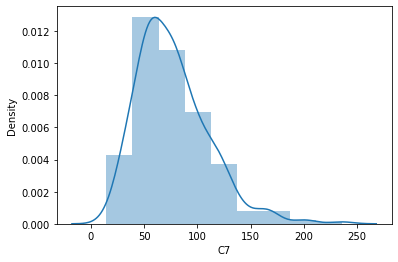

In [47]:
sns_plot = sns.distplot(data_frame['C7'], bins=number)
fig = sns_plot.get_figure()

In [48]:
f_1 = np.array([33., 100., 84., 54., 29., 6., 6., 2., 1.])
f_2 = np.array([315 * probabilities[i] for i in range(number)])

In [49]:
m1 = sps.describe(f_1)[2]
m2 = sps.describe(f_2)[2]

In [50]:
sps.chisquare(f_obs=f_1, f_exp=f_2  * float(m1 / m2), ddof=2) 

Power_divergenceResult(statistic=136.11572105304234, pvalue=6.612017938543149e-27)

In [51]:
def pirson_test(x, y):
  n = 315
  m = 9
  sum = 0
  for i in range(m):
    sum += (x[i] - n * y[i]) ** 2 / (n * y[i])
  z = sum 
  f = sps.chi2.cdf(z, df=6)
  return z, 1 - f

In [52]:
print(pirson_test(frequencies, probabilities))

(140.95765096920547, 0.0)


**Задание 4.2**

In [53]:
sps.describe(data_frame['C7'])

DescribeResult(nobs=315, minmax=(14.4, 235.9), mean=77.03333333333333, variance=1144.431210191083, skewness=1.0989962157492976, kurtosis=1.9647991849352238)

In [54]:
sps.jarque_bera(data_frame['C7'])

Jarque_beraResult(statistic=114.07733617936984, pvalue=0.0)

In [55]:
n = sps.describe(data_frame['C7'])[0]
sk = sps.describe(data_frame['C7'])[4]
kurt = sps.describe(data_frame['C7'])[5]

In [56]:
def jarque_bera_test(x):
    z = n / 6 * (sk ** 2 + kurt ** 2 / 4)
    f = sps.chi2.cdf(z, df=2)
    return z, 1 - f

In [57]:
print(jarque_bera_test(data_frame['C7']))

(114.07733617936985, 0.0)


**Задание 5**

**Задание 5.1**

In [58]:
sign_test(data_frame['C13'], data_frame['C14'])

(-146.5, 1.9772043529779528e-75)

**Задание 5.2**

In [59]:
number = int(1 + math.log2(n))
print(number)

9


In [60]:
step = int((data_frame['C13'].max() - data_frame['C13'].min()) / number)
print(step)

157


[215.  73.  17.   2.   3.   2.   1.   2.   0.]
[   0.          191.88888889  383.77777778  575.66666667  767.55555556
  959.44444444 1151.33333333 1343.22222222 1535.11111111]
[ 191.88888889  383.77777778  575.66666667  767.55555556  959.44444444
 1151.33333333 1343.22222222 1535.11111111 1727.        ]
[  2.  28. 134.  92.  45.   8.   3.   2.   1.]
[   0.          191.88888889  383.77777778  575.66666667  767.55555556
  959.44444444 1151.33333333 1343.22222222 1535.11111111]
[ 191.88888889  383.77777778  575.66666667  767.55555556  959.44444444
 1151.33333333 1343.22222222 1535.11111111 1727.        ]


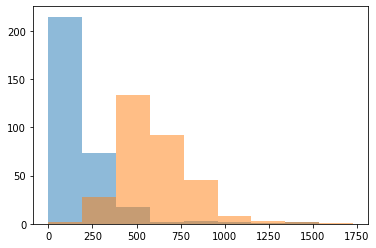

In [61]:
left = min(min(data_frame['C13']), min(data_frame['C14']))
right = max(max(data_frame['C13']), max(data_frame['C14']))
step = (right - left) / number
bins = [left + step * i for i in range(0, number + 1)]

frequencies_1, edges_1, _ = plt.hist(data_frame['C13'], bins=bins, alpha=0.5)
midpoints_1 = 0.5 * (edges_1[1:] + edges_1[:-1])
print(frequencies_1)
print(edges_1[:-1])
print(edges_1[1:])

frequencies_2, edges_2, _ = plt.hist(data_frame['C14'], bins=bins, alpha=0.5)
midpoints_2 = 0.5 * (edges_2[1:] + edges_2[:-1])
print(frequencies_2)
print(edges_2[:-1])
print(edges_2[1:])

[0.68253968 0.23174603 0.05396825 0.00634921 0.00952381 0.00634921
 0.0031746  0.00634921 0.        ]

[0.00634921 0.08888889 0.42539683 0.29206349 0.14285714 0.02539683
 0.00952381 0.00634921 0.0031746 ]


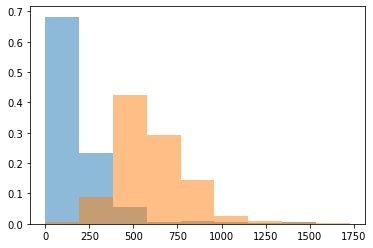

In [62]:
relative_frequencies_1, edges_1, _ = plt.hist(data_frame['C13'], bins=bins, alpha=0.5, weights=np.zeros_like(data_frame['C13']) + 1. / n)
midpoints_1 = 0.5 * (edges_1[1:] + edges_1[:-1])
print(relative_frequencies_1)
print()

relative_frequencies_2, edges_2, _ = plt.hist(data_frame['C14'], bins=bins, alpha=0.5, weights=np.zeros_like(data_frame['C14']) + 1. / n)
midpoints_2 = 0.5 * (edges_2[1:] + edges_2[:-1])
print(relative_frequencies_2)

In [63]:
sps.chisquare(f_obs=relative_frequencies_1, f_exp=relative_frequencies_2, ddof=2)

Power_divergenceResult(statistic=72.99382525899497, pvalue=9.928006143298864e-14)

**Задание 6**

In [64]:
n = len(data_frame["C3"])
n

315

In [65]:
data_frame["C2"].unique()

array(['Female', 'Male'], dtype=object)

In [66]:
data_frame["C3"].unique()

array(['Former', 'Never', 'Current Smoker'], dtype=object)

In [67]:
emp_table = pd.crosstab(index=data_frame["C2"], columns=data_frame["C3"], margins=True)
emp_table

C3,Current Smoker,Former,Never,All
C2,,,,
Female,36,93,144,273
Male,7,22,13,42
All,43,115,157,315


In [68]:
teor_table = sps.chi2_contingency(emp_table)[3]
teor_table

array([[ 37.26666667,  99.66666667, 136.06666667, 273.        ],
       [  5.73333333,  15.33333333,  20.93333333,  42.        ],
       [ 43.        , 115.        , 157.        , 315.        ]])

In [69]:
sps.chi2_contingency(emp_table)[:2]

(7.136512415601504, 0.30840701536046683)

**Задание 7**

In [70]:
data_frame["C5"].unique()

array(['Often', 'Not often', 'No'], dtype=object)

In [71]:
f_c = data_frame.groupby(["C5"])["C5"].count()
f_c

C5
No           111
Not often     82
Often        122
Name: C5, dtype: int64

In [72]:
n1 = f_c[0]
n2 = f_c[1]
n3 = f_c[2]
n = n1 + n2 + n3

In [73]:
no = data_frame[data_frame["C5"] == "No"]
no_mean = no["C13"].mean()
no_mean

136.8918918918919

In [74]:
no_var = no["C13"].var()
no_var

8493.660933660934

In [75]:
not_often = data_frame[data_frame["C5"] == "Not often"]
not_often_mean = not_often["C13"].mean()
not_often_mean

185.65853658536585

In [76]:
not_often_var= not_often["C13"].var()
not_often_var

20775.388136103582

In [77]:
often = data_frame[data_frame["C5"] == "Often"]
often_mean = often["C13"].mean()
often_mean

240.95901639344262

In [78]:
often_var = often["C13"].var()
often_var

60058.70078580138

In [79]:
mean = (n1 * no_mean + n2 * not_often_mean + n3 * often_mean) / n
mean

189.8920634920635

In [80]:
k = len(data_frame["C5"].unique())
k

3

In [81]:
D_b = (n1 * (no_mean - mean) ** 2 + n2 * (not_often_mean - mean) ** 2 + n3 * (often_mean - mean) ** 2) / n
D_b

2004.5282328560947

In [82]:
D_w = (n1 * no_var + n2 * not_often_var + n3 * often_var) / n
D_w

31662.030751316273

In [83]:
X = [no["C13"], not_often["C13"], often["C13"]]
sum = 0
for x in X:
  for i in x:
    sum += (i - mean) ** 2
D_x = sum / n
D_x

33382.978825900725

In [84]:
D_x_sum = D_w + D_b 
D_x_sum

33666.55898417237

In [85]:
unb_est_b = n * D_b / (k - 1)
unb_est_b

315713.19667483494

In [86]:
unb_est_w = n * D_w / (n - k)
unb_est_w

31966.473354694313

In [87]:
unb_est_x = n * D_x / (n - 1)
unb_est_x

33489.2940450915

In [88]:
eta_sq = D_b / D_x
eta_sq

0.060046415968752584

In [89]:
eta = math.sqrt(D_b / D_x)
eta

0.24504370216096677

In [90]:
sps.f_oneway(no["C13"], not_often["C13"], often["C13"])

F_onewayResult(statistic=9.96564197452329, pvalue=6.376754182611269e-05)

**Задание 8**

**Задание 8.1**

In [91]:
r, p_value_r = sps.pearsonr(data_frame["C13"], data_frame["C14"])
print(r, p_value_r, sep="\n")

0.07157724015217476
0.20517488254189867


In [92]:
rsp, p_value_rsp = sps.spearmanr(data_frame["C13"], data_frame["C14"])
print(rsp, p_value_r, sep="\n")

0.13062133340920742
0.20517488254189867


In [93]:
tau, p_value_tau = sps.kendalltau(data_frame["C13"], data_frame["C14"])
print(tau, p_value_tau, sep="\n")

0.0857942303995992
0.02343985266111217


In [94]:
#r.confidence_interval(confidence_level=0.95) - почему-то не работает

In [95]:
alpha = [0.01, 0.05, 0.1]
a = r + (r * (1 - r ** 2)) / (2 * n)
for a in alpha:
  b = sps.norm.ppf(1 - a / 2, (1 - r ** 2) / math.sqrt(n))
  print("alpha=", a, ":", sep="")
  print("lower edge:", a - b)
  print("higher edge:", a + b)
  print()

alpha=0.01:
lower edge: -2.621884255204232
higher edge: 2.6418842552042316

alpha=0.05:
lower edge: -1.9660189361953855
higher edge: 2.0660189361953853

alpha=0.1:
lower edge: -1.6009085786068036
higher edge: 1.8009085786068038



In [96]:
z_r = (r / math.sqrt(1 - r ** 2)) * math.sqrt(n - 2)
z_r

1.2695870624981909

In [97]:
z_r_sp = (rsp / math.sqrt(1 - rsp ** 2)) * math.sqrt(n - 2)
z_r_sp

2.330897651015813

In [98]:
z_tau = tau * math.sqrt(9 * n * (n + 1) / (2 * (2 * n + 5)))
z_tau

2.2786430348594875

**Задание 8.2**

In [99]:
data = {"C7": data_frame["C7"], "C9": data_frame["C9"], "C12": data_frame["C12"]}
df = pd.DataFrame(data)
df.corr(method="kendall")

,C7,C9,C12
C7,1.000000,0.040055,0.351902
C9,0.040055,1.000000,-0.029812
C12,0.351902,-0.029812,1.000000


In [100]:
data_p = {
    "C7": [sps.kendalltau(data_frame["C7"], data_frame["C7"])[1], sps.kendalltau(data_frame["C7"], data_frame["C9"])[1], sps.kendalltau(data_frame["C7"], data_frame["C12"])[1]], 
    "C9": [sps.kendalltau(data_frame["C9"], data_frame["C7"])[1], sps.kendalltau(data_frame["C9"], data_frame["C9"])[1], sps.kendalltau(data_frame["C9"], data_frame["C12"])[1]],
    "C12": [sps.kendalltau(data_frame["C12"], data_frame["C7"])[1], sps.kendalltau(data_frame["C12"], data_frame["C9"])[1], sps.kendalltau(data_frame["C12"], data_frame["C12"])[1]]
    }
df_p = pd.DataFrame(data_p)
df_p

,C7,C9,C12
0,3.506982e-154,3.139794e-01,1.295163e-20
1,3.139794e-01,4.104617e-126,4.535993e-01
2,1.295163e-20,4.535993e-01,3.362934e-154


In [101]:
R1 = sps.rankdata(data_frame["C7"])
R2 = sps.rankdata(data_frame["C9"])
R3 = sps.rankdata(data_frame["C12"])

In [102]:
sum1 = 0
sum2 = 0
for i in range(n):
  for r in [R1, R2, R3]:
    sum1 += r[i]
  sum2 += (sum1 - k * (n + 1) / 2) ** 2
  sum1 = 0
W = 12 * sum2 / ((n ** 3 - n) * (k ** 2))
W

0.44417366595468666

In [103]:
Z = n * (k - 1) * W
Z

279.8294095514526

In [104]:
a = 0.1
kr_p = sps.chi2.ppf(a, n - 1)
kr_p

282.3430452011803

Получила, что значение Z меньше, чем значение критической точки, то есть коэффициент конкордации не значим

In [105]:
p_value = 1 - sps.chi2.cdf(Z, n - 1)
p_value

0.9176686807978349

**Задание 9**

**Задание 9.1**

Задание 9.1.1

In [106]:
x = data_frame["C6"]
y = data_frame["C13"]
n = 315

In [107]:
r, p_v = sps.pearsonr(x, y)

In [108]:
b0 = y.mean() - r * x.mean() * y.std() / x.std()
print(b0)
b1 = r * y.std() / x.std()
print(b1)

200.6239454749055
-0.005973258278958724


In [109]:
sum = 0
for elem in x:
  sum += (b0 + b1 * elem - y.mean()) ** 2
D_r = sum / n
print(D_r)

16.462780398473043


In [110]:
sum = 0
a = list(zip(x, y))
for elem in a:
  sum += (elem[1] - (b0 + b1 * elem[0])) ** 2
D_ost = sum / n
print(D_ost)

33366.516045502256


In [111]:
sum = 0
for elem in y:
  sum += (elem - y.mean()) ** 2
D_y = sum / n
print(D_y)

33382.97882590072


In [112]:
k = 2
est_r = n * D_r / (k - 1)
est_ost = n * D_ost / (n - k)
est_y = n * D_y / (n - 1)
print(est_r, est_ost, est_y, sep="\n")

5185.775825519008
33579.720620872875
33489.29404509148


In [113]:
D_y_sum = D_r + D_ost
print(D_y_sum)

33382.978825900725


In [114]:
R_sq = D_r / D_y
R = math.sqrt(D_r / D_y)
print(R_sq, R, sep='\n')

0.000493148933303104
0.022206956867232033


Задание 9.1.2

In [115]:
alpha = [0.01, 0.05, 0.1]
print("b0")
for a in alpha:
  z = sps.t.ppf(1 - a / 2, n - 2) * math.sqrt(D_ost) * math.sqrt(np.sum([elem ** 2 for elem in x]) / (n ** 2 * x.var()))
  print(a)
  print("l:", b0 - z)
  print("h:", b0 + z)
  print()

print("b1")
for a in alpha:
  z = sps.t.ppf(1 - a / 2, n - 2) * math.sqrt(D_ost / (n * x.var())) 
  print(a)
  print("l:", b1 - z)
  print("h:", b1 + z)
  print()

b0
0.01
l: 125.31992251590073
h: 275.9279684339103

0.05
l: 143.4528909519943
h: 257.7949999978167

0.1
l: 152.68812898968702
h: 248.55976196012398

b1
0.01
l: -0.045178308606084266
h: 0.033231792048166814

0.05
l: -0.03573785758922106
h: 0.02379134103130361

0.1
l: -0.03092977486238141
h: 0.018983258304463964



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


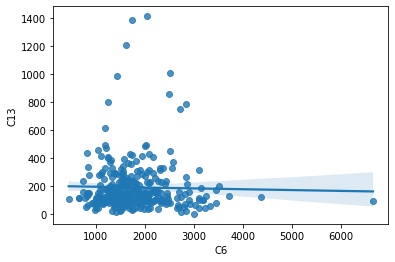

In [116]:
sns.regplot(x, y)

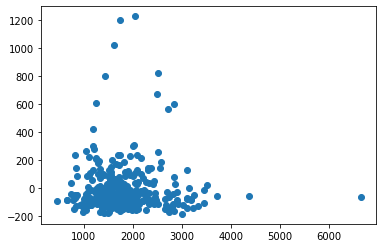

In [117]:
plt.plot(x, [elem_y - (b0 + b1 * elem_x) for elem_x, elem_y in zip(x, y)], "o")
plt.show()

Задание 9.1.3

In [118]:
statistics = R_sq * (n - 2) / (1 - R_sq)
p_value = 1 - sps.f.cdf(statistics, 1, n - 2)
print(statistics, p_value)

0.15443177398848207 0.694603179135282


**Задание 9.2**

Задание 9.2.1

In [119]:
F = np.array([[1, elem, elem ** 2] for elem in x])
b = np.linalg.inv((F.T).dot(F)).dot(F.T).dot(np.array(y))
b

array([ 1.56531322e+02,  3.70710218e-02, -9.01050102e-06])

In [120]:
b0 = b[0]
b1 = b[1]
b2 = b[2]

In [121]:
sum = 0
for elem in x:
  sum += (b0 + b1 * elem + b2 * elem ** 2  - y.mean()) ** 2
D_r = sum / n
print(D_r)

136.46102080306048


In [122]:
sum = 0
a = list(zip(x, y))
for elem in a:
  sum += (elem[1] - (b0 + b1 * elem[0] + b2 * elem[0] ** 2)) ** 2
D_ost = sum / n
print(D_ost)

33246.517805097676


In [123]:
sum = 0
for elem in y:
  sum += (elem - y.mean()) ** 2
D_y = sum / n
print(D_y)

33382.97882590072


In [124]:
k = 3
est_r = n * D_r / (k - 1)
est_ost = n * D_ost / (n - k)
est_y = n * D_y / (n - 1)
print(est_r, est_ost, est_y, sep="\n")

21492.610776482026
33566.19586091593
33489.29404509148


In [125]:
D_y_sum = D_r + D_ost
print(D_y_sum)

33382.97882590073


In [126]:
R_sq = D_r / D_y
R = math.sqrt(D_r / D_y)
print(R_sq, R, sep='\n')

0.004087742484417988
0.06393545561281305


Задание 9.2.2

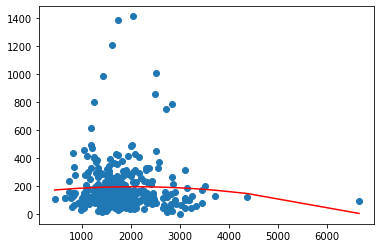

In [127]:
b = sps.t.ppf(1 - 0.1 / 2, n - 3) * math.sqrt(D_ost)
c = np.linalg.inv((F.T).dot(F))
x_s = sorted(list(x))
plt.plot(x, y, 'o')
plt.plot(x_s, [b0 + b1 * elem + b2 * elem ** 2 for elem in x_s], 'r')
plt.show()

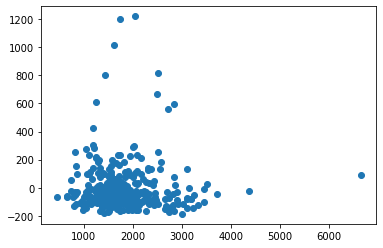

In [128]:
plt.plot(x, [elem_y - (b0 + b1 * elem_x + b2 * elem_x ** 2) for elem_x, elem_y in zip(x, y)], "o")
plt.show()

Задание 9.2.3

In [129]:
k = 3
statistics = R_sq * (n - k) / ((1 - R_sq) * (k - 1))
p_value = 1 - sps.f.cdf(statistics, k - 1, n - k)
print(statistics, p_value)

0.6403052304627638 0.5278227554063295


**Задание 9.3**

In [130]:
x1 = data_frame["C6"]
x2 = data_frame["C11"]
y = data_frame["C13"]

In [131]:
F = np.array([[1, elem_x1, elem_x2] for elem_x1, elem_x2 in zip(x1, x2)])
b = np.linalg.inv((F.T).dot(F)).dot(F.T).dot(np.array(y))
b

array([ 1.63004105e+02, -2.19907501e-02,  3.03795958e-02])

In [132]:
b0 = b[0]
b1 = b[1]
b2 = b[2]

In [133]:
D_r = np.sum([(b0 + b1 * elem_x1 + b2 * elem_x2 - y.mean()) ** 2 for elem_x1, elem_x2 in zip(x1, x2)]) / n
print(D_r)

1896.6175210691147


In [134]:
D_ost = np.sum([(elem_y - (b0 + b1 * elem_x1 + b2 * elem_x2)) ** 2 for elem_x1, elem_x2, elem_y in zip(x1, x2, y)]) / n
print(D_ost)

31486.361304831622


In [135]:
D_y = np.sum([(elem_y - y.mean()) ** 2 for elem_y in y]) / n
print(D_y)

33382.97882590073


In [136]:
k = 3
est_r = n * D_r / (k - 1)
est_ost = n * D_ost / (n - k)
est_y = n * D_y / (n - 1)
print(est_r, est_ost, est_y, sep="\n")

298717.25956838555
31789.114778916544
33489.2940450915


In [137]:
D_y_sum = D_r + D_ost
print(D_y_sum)

33382.97882590074


In [138]:
R_sq = D_r / D_y
R = math.sqrt(D_r / D_y)
print(R_sq, R, sep='\n')

0.05681390899716813
0.23835668439791682
